## 3 - Which are the main reasons our employees are leaving us?

In [20]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,fecha_corte,tenure_days,tenure_months,tenure_years
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,4.60,5,0,2019-01-17,0,1,2019-12-31,3101,103,8
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.96,3,6,2016-02-24,0,17,2016-06-16,444,14,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3.02,3,0,2012-05-15,0,3,2012-09-24,447,14,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,4.84,5,0,2019-01-03,0,15,2019-12-31,4376,145,12
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,5.00,4,0,2016-02-01,0,2,2016-09-06,1884,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,4.07,4,0,2019-02-28,0,13,2019-12-31,2003,66,5
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,3.20,2,0,2015-09-02,5,4,2015-09-29,2583,86,7
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,4.60,5,6,2019-02-21,0,16,2019-12-31,3552,118,9
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,5.00,3,5,2019-02-01,0,11,2019-12-31,1737,57,4


In [38]:
#Rotación Voluntaria General
n_empleados = df['EmpID'].nunique()
turnover = df[df['EmploymentStatus'] == 'Voluntarily Terminated'].shape[0]
turnover_rate = turnover/n_empleados

print("Total empleados: "+str(n_empleados)+" | Total turnover: "+str(turnover)+" | Tasa rotación voluntaria: "+str(turnover_rate))

Total empleados: 311 | Total turnover: 88 | Tasa rotación voluntaria: 0.2829581993569132


**Análisis de Correlación**

Seleccionamos un DF que contenga solo las salidas voluntarias para analizarlas.

In [35]:
df_voluntary = df[
    (df['EmploymentStatus'] == 'Voluntarily Terminated') & 
    (df['Department'].isin(['Production', 'Software Engineering']))
]
df_voluntary.groupby('TermReason')['EmpID'].count().sort_values(ascending=False)
#df['voluntary_terminated'] = ((df['Termd'] == 1) & (df['EmploymentStatus'] == 'Voluntarily Terminated')).astype(int)

TermReason
Another position                    18
unhappy                             14
more money                          11
career change                        7
hours                                6
return to school                     5
military                             4
relocation out of area               4
retiring                             4
maternity leave - did not return     2
medical issues                       2
attendance                           1
Name: EmpID, dtype: int64

Las razones principales de las salidas voluntarias son: Anothe position, unhappy y more money.

In [36]:
#Cálculo de Rotación voluntaria por departamento
df_resumen_dpto_vol = df.groupby('Department').agg(
    n_empleados = ('EmpID','nunique'),
    n_turnover_vol = ('voluntary_terminated','sum')

)
df_resumen_dpto_vol['turnover_rate'] = df_resumen_dpto_vol['n_turnover_vol']/df_resumen_dpto_vol['n_empleados']*100
print(df_resumen_dpto_vol)

                      n_empleados  n_turnover_vol  turnover_rate
Department                                                      
Admin Offices                   9               1      11.111111
Executive Office                1               0       0.000000
IT/IS                          50               6      12.000000
Production                    209              75      35.885167
Sales                          31               3       9.677419
Software Engineering           11               3      27.272727


La tasa de rotación voluntaria general (28%) se explica en gran medida por la alta tasa de rotación voluntaria del departamento de **Producción: 35,8%** y adicionalmente la cantidad de empleados representa casi el 70% de la nómina.

/var/folders/f1/3k6g_h6s065g1bg5vsbjq5ym0000gn/T/ipykernel_3607/2684955973.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TurnoverRate', y='Department', data=turnover_data, palette='Blues_d')


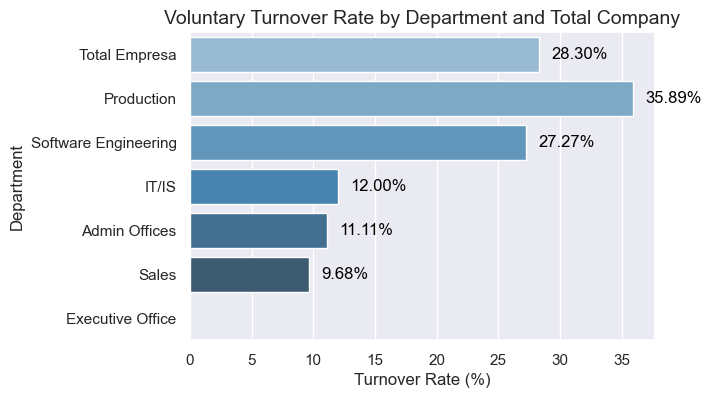

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Calcular la tasa de rotación total de la empresa
employees_left = df[df['EmploymentStatus'].isin(['Voluntarily Terminated'])]
num_employees_left = len(employees_left)
num_total_employees = len(df)
turnover_rate_total = (num_employees_left / num_total_employees) * 100

# Paso 2: Calcular la tasa de rotación por departamento
# Filtrar empleados que dejaron la empresa por departamento
turnover_by_department = df[df['EmploymentStatus'].isin(['Voluntarily Terminated'])]
turnover_by_department = turnover_by_department.groupby('Department').size()

# Calcular el total de empleados por departamento
total_by_department = df.groupby('Department').size()

# Calcular la tasa de rotación por departamento
turnover_rate_by_department = (turnover_by_department / total_by_department) * 100

# Convertir los resultados a un DataFrame para visualización
turnover_data = turnover_rate_by_department.reset_index(name='TurnoverRate')
turnover_data['Department'] = turnover_data['Department'].astype(str)  # Convertir Department a string para la visualización

# Agregar la tasa de rotación total de la empresa a los resultados
turnover_data_total = pd.DataFrame({'Department': ['Total Empresa'], 'TurnoverRate': [turnover_rate_total]})
turnover_data = pd.concat([turnover_data, turnover_data_total], ignore_index=True)

# Paso 3: Ordenar el DataFrame por tasa de rotación de mayor a menor, pero asegurarse de que 'Total Empresa' esté arriba
turnover_data = turnover_data.sort_values(by='TurnoverRate', ascending=False)

# Reordenar para poner la fila 'Total Empresa' siempre arriba
total_row = turnover_data[turnover_data['Department'] == 'Total Empresa']
turnover_data = turnover_data[turnover_data['Department'] != 'Total Empresa']
turnover_data = pd.concat([total_row, turnover_data], ignore_index=True)

# Paso 4: Crear el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='TurnoverRate', y='Department', data=turnover_data, palette='Blues_d')

# Agregar los valores nominales en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')

# Agregar título y etiquetas
plt.title('Voluntary Turnover Rate by Department and Total Company', fontsize=14)
plt.xlabel('Turnover Rate (%)', fontsize=12)
plt.ylabel('Department', fontsize=12)

# Mostrar el gráfico
plt.show()

/var/folders/f1/3k6g_h6s065g1bg5vsbjq5ym0000gn/T/ipykernel_3607/3984239003.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=terminated_count.index, y=terminated_count.values, palette='Blues_d')  # 'Blues_d' es una versión más fuerte de la paleta azul


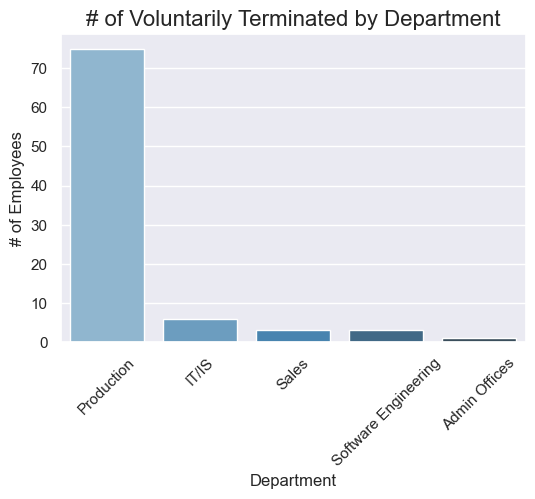

In [41]:
# Filtrar el DataFrame para obtener solo las filas donde el estado de empleo sea 'Voluntarily Terminated'
voluntarily_terminated_df = df[df['EmploymentStatus'] == 'Voluntarily Terminated']

# Contar las ocurrencias por departamento
terminated_count = voluntarily_terminated_df['Department'].value_counts()

# Crear el gráfico de barras con colores más fuertes (azules)
plt.figure(figsize=(6, 4))
sns.barplot(x=terminated_count.index, y=terminated_count.values, palette='Blues_d')  # 'Blues_d' es una versión más fuerte de la paleta azul

# Agregar título y etiquetas
plt.title('# of Voluntarily Terminated by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('# of Employees', fontsize=12)

# Rotar las etiquetas del eje X si son largas
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Se observa que el departamento de producción no solo tiene una alta tasa de rotación si no que tiene el mayor volumen de salidas voluntarias (75).

#### Análisis sobre el Departamento de Producción

/var/folders/f1/3k6g_h6s065g1bg5vsbjq5ym0000gn/T/ipykernel_3607/77303085.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turnover_rate.index, y=turnover_rate.values, palette='Blues_d')


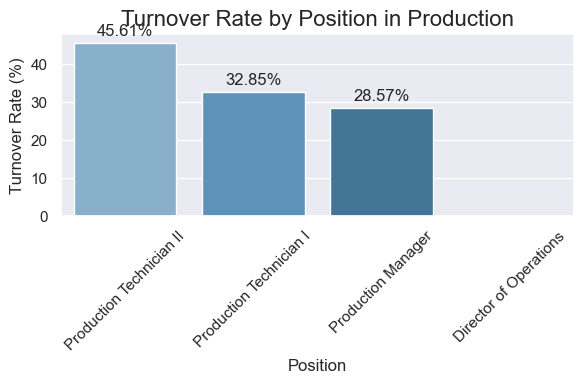

In [42]:
# Filtrar los datos para obtener solo el departamento 'Production'
production_df = df[df['Department'] == 'Production']

# Contar el total de empleados por posición dentro del departamento 'Production'
total_employees_by_position = production_df['Position'].value_counts()

# Filtrar los datos para obtener solo los empleados 'Voluntarily Terminated'
voluntary_terminated_df = production_df[production_df['EmploymentStatus'] == 'Voluntarily Terminated']

# Contar el número de empleados 'Voluntarily Terminated' por posición
terminated_employees_by_position = voluntary_terminated_df['Position'].value_counts()

# Calcular la tasa de rotación (número de empleados voluntariamente terminados / total de empleados) por posición
turnover_rate = (terminated_employees_by_position / total_employees_by_position) * 100

# Ordenar la tasa de rotación de mayor a menor
turnover_rate = turnover_rate.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=turnover_rate.index, y=turnover_rate.values, palette='Blues_d')

# Agregar título y etiquetas
plt.title('Turnover Rate by Position in Production', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Turnover Rate (%)', fontsize=12)

# Poner los valores nominales encima de las barras
for i, v in enumerate(turnover_rate.values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

# Rotar las etiquetas del eje X si son largas
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Al revisar las tasas de rotación voluntaria por tipo de rol. Todas son altas destacando el "Production Technician II" con un 45,6%

/var/folders/f1/3k6g_h6s065g1bg5vsbjq5ym0000gn/T/ipykernel_3607/2634082736.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=terminated_count_by_position.index, y=terminated_count_by_position.values, palette='Blues_d')


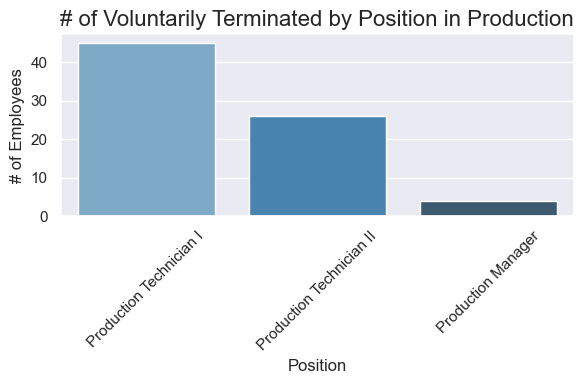

In [43]:
filtered_df = df[(df['EmploymentStatus'] == 'Voluntarily Terminated') & (df['Department'] == 'Production')]

# Contar las ocurrencias por 'Position'
terminated_count_by_position = filtered_df['Position'].value_counts()

# Verificar si hay datos antes de graficar
if not terminated_count_by_position.empty:
    # Crear el gráfico de barras verticales
    plt.figure(figsize=(6, 4))
    sns.barplot(x=terminated_count_by_position.index, y=terminated_count_by_position.values, palette='Blues_d')

    # Agregar título y etiquetas
    plt.title('# of Voluntarily Terminated by Position in Production', fontsize=16)
    plt.xlabel('Position', fontsize=12)
    plt.ylabel('# of Employees', fontsize=12)

    # Rotar las etiquetas del eje X si son largas
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("No data available for 'Voluntarily Terminated' in 'Production'.")

En volumen, el Production Technician I es el mayor.

In [44]:
# Filtrar el DataFrame para que contenga solo 'Voluntarily Terminated' y los departamentos específicos
filtered_df = df[
    (df['EmploymentStatus'] == 'Voluntarily Terminated') & 
    (df['Department'].isin(['Production']))
]

# Contar las ocurrencias de 'TermReason' para cada departamento y ordenarlas de mayor a menor
term_reason_order = filtered_df.groupby('TermReason').size().sort_values(ascending=False).index
print(term_reason_order)

Index(['Another position', 'unhappy', 'more money', 'career change', 'hours',
       'return to school', 'military', 'relocation out of area', 'retiring',
       'maternity leave - did not return', 'attendance', 'medical issues'],
      dtype='object', name='TermReason')


/var/folders/f1/3k6g_h6s065g1bg5vsbjq5ym0000gn/T/ipykernel_3607/868547859.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(y='TermReason',


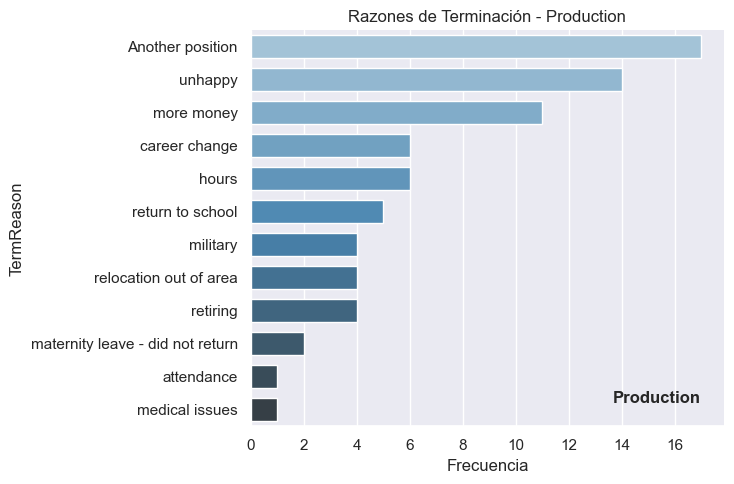

In [46]:
# Filtrar el DataFrame para que contenga solo 'Voluntarily Terminated' y los departamentos específicos
filtered_df = df[
    (df['EmploymentStatus'] == 'Voluntarily Terminated') & 
    (df['Department'].isin(['Production']))
]

# Contar las ocurrencias de 'TermReason' para cada departamento y ordenarlas de mayor a menor
term_reason_order = filtered_df.groupby('TermReason').size().sort_values(ascending=False).index
#print(term_reason_order)
# Configuración de tamaño de fuente original
sns.set(font_scale=1)

# Crear el gráfico de conteo por 'TermReason' y departamentos con paleta de azules
g = sns.catplot(y='TermReason', 
                data=filtered_df,
                #hue='TermReason',
                col='Department',
                kind='count',
                height=5,
                aspect=1.5,
                order=term_reason_order,
                palette='Blues_d',  # Usar paleta de azules en degradado
                legend=False)

# Ajustar título y etiquetas de ejes
g.set_axis_labels("Frecuencia", "TermReason")
g.set_titles("Razones de Terminación - {col_name}")

# Agregar los nombres de departamento a la parte inferior derecha de cada subgráfico
for ax, title in zip(g.axes.flat, g.col_names):
    ax.text(0.95, 0.05, title, ha='right', va='bottom', transform=ax.transAxes, fontsize=12, weight='bold')
    
    # Modificar el grosor de las barras en cada subgráfico
    for i, bar in enumerate(ax.patches):
        # Ajustar la altura (grosor) de la barra
        bar.set_height(0.7)  # Valor fijo para todas las barras
        
        # Ajustar la posición vertical para centrar las barras
        current_y = bar.get_y()
        category_position = i % len(term_reason_order)
        new_y = category_position - 0.35
        bar.set_y(new_y)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Las principales razones de salida del departamento de producción son: anothe position, unhappy y more money.

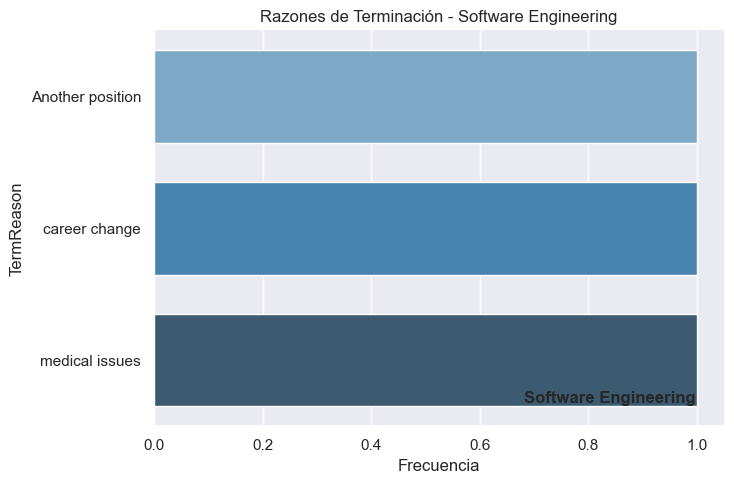

In [47]:
# Filtrar el DataFrame para que contenga solo 'Voluntarily Terminated' y los departamentos específicos
filtered_df = df[
    (df['EmploymentStatus'] == 'Voluntarily Terminated') & 
    (df['Department'].isin(['Software Engineering']))
]

# Contar las ocurrencias de 'TermReason' para cada departamento y ordenarlas de mayor a menor
term_reason_order = filtered_df.groupby('TermReason').size().sort_values(ascending=False).index

# Configuración de tamaño de fuente original
sns.set(font_scale=1)

# Crear el gráfico de conteo por 'TermReason' y departamentos con paleta de azules
g = sns.catplot(y='TermReason', 
                data=filtered_df,
                hue='TermReason',
                col='Department',
                kind='count',
                height=5,
                aspect=1.5,
                order=term_reason_order,
                palette='Blues_d',  # Usar paleta de azules en degradado
                legend=False)

# Ajustar título y etiquetas de ejes
g.set_axis_labels("Frecuencia", "TermReason")
g.set_titles("Razones de Terminación - {col_name}")

# Agregar los nombres de departamento a la parte inferior derecha de cada subgráfico
for ax, title in zip(g.axes.flat, g.col_names):
    ax.text(0.95, 0.05, title, ha='right', va='bottom', transform=ax.transAxes, fontsize=12, weight='bold')
    
    # Modificar el grosor de las barras en cada subgráfico
    for i, bar in enumerate(ax.patches):
        # Ajustar la altura (grosor) de la barra
        bar.set_height(0.7)  # Valor fijo para todas las barras
        
        # Ajustar la posición vertical para centrar las barras
        current_y = bar.get_y()
        category_position = i % len(term_reason_order)
        new_y = category_position - 0.35
        bar.set_y(new_y)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [31]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'fecha_corte', 'tenure_days', 'tenure_months',
       'tenure_years', 'voluntary_terminated'],
      dtype='object')

Buscaremos las variables númericas que nos puedan ayudar a entender si hay alguna correlación entre la salida voluntaria y alguna de ellas.

In [32]:
# Calcular la correlación con salidas
variables_numericas = df.select_dtypes(include=['number']).columns
print(variables_numericas)

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'tenure_days',
       'tenure_months', 'tenure_years', 'voluntary_terminated'],
      dtype='object')


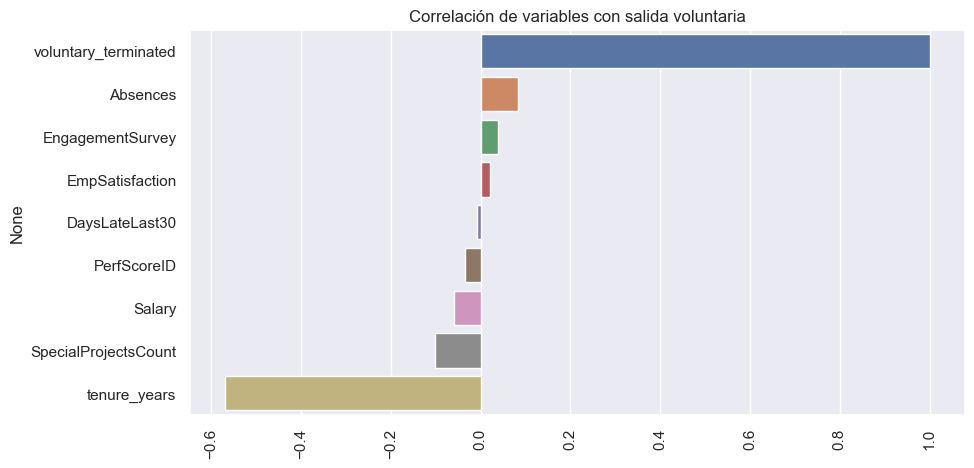

In [49]:
# Calcular la correlación con salidas
variables_numericas = df.select_dtypes(include=['number']).columns
df_analisis = df[df['Department'].isin(['Production', 'Software Engineering'])]
df_analisis = df_analisis[[
        'PerfScoreID', 'Salary', 
         'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences',
       'voluntary_terminated',
       'tenure_years']]

correlaciones = df_analisis.corr()["voluntary_terminated"].sort_values(ascending=False)

# Graficar las correlaciones más altas
plt.figure(figsize=(10, 5))
sns.barplot(x=correlaciones.values, y=correlaciones.index, hue=correlaciones.index, legend=False)
plt.xticks(rotation=90)
plt.title("Correlación de variables con salida voluntaria")
plt.show()

Vemos que no existe una mayor correlación entre las salidas voluntarias y las variables númericas, a expepción de la permanencia que tiene una correlación negativa, probablemente muy apalancada en el hecho que son personas que ya se han ido y que en promedio ya han durado menos que aquellos que no lo han hecho.

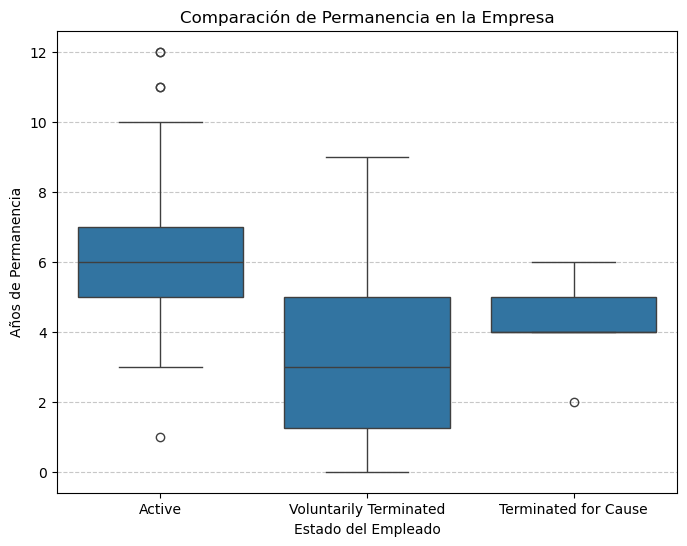

In [ ]:
# Crear Boxplot con Seaborn
plt.figure(figsize=(8, 6))
production_software = df[df['Department'].isin(['Production','Software Engineering'])]
sns.boxplot(x='EmploymentStatus', y='tenure_years', data=production_software)

# Personalizar gráfico
plt.title("Comparación de Permanencia en la Empresa")
plt.xlabel("Estado del Empleado")
plt.ylabel("Años de Permanencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

Acá podemos obserservar que en promedio los que se van duran 3 años, cuando lo que se quedan tienen un promedio de 6 años en la compañía.

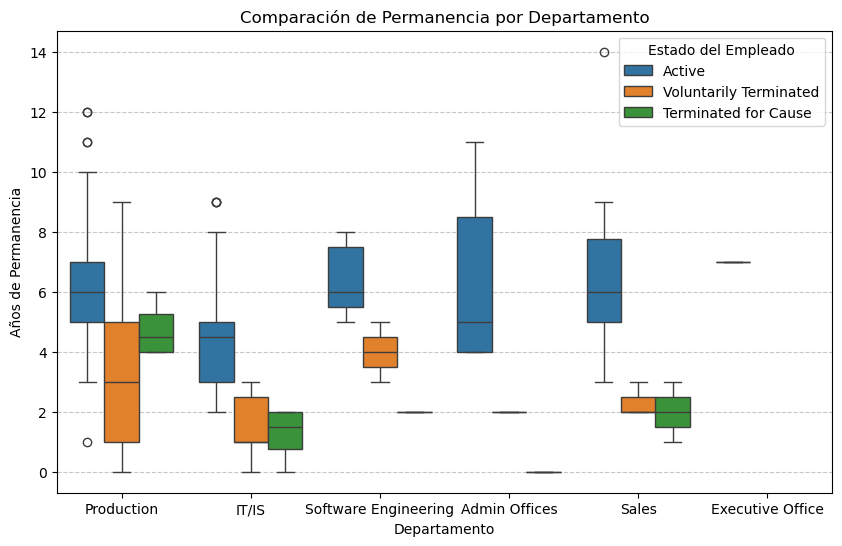

In [ ]:
# Crear gráfico con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='tenure_years', hue='EmploymentStatus', data=df)

# Personalizar gráfico
plt.title("Comparación de Permanencia por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Años de Permanencia")
plt.legend(title="Estado del Empleado")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

Vemos consistentemente que la permanencia de lo que se han ido es menor que las que se quedan en todos los departamentos

A continuación analizaremos las variables categoricas para ver si encontramos alguna segmento que tienda a irse más que otro:

In [ ]:
# Calcular tasa de salida voluntaria por cada categoría
categorical_columns = df[[
        'Position',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc','TermReason',
       'Department', 'RecruitmentSource',
       'PerformanceScore']]  

df_production_software = df[df['Department'].isin(['Production', 'Software Engineering'])]
for col in categorical_columns:
    resumen = (
        df_production_software.groupby(col)
        .agg(
            total_empleados=('EmpID', 'count'),
            total_voluntarios=('voluntary_terminated', 'sum')
        )
        .assign(tasa_voluntaria=lambda x: (x['total_voluntarios'] / x['total_empleados']) * 100)
    )
    resumen = resumen.sort_values(by='tasa_voluntaria', ascending=False)
    print(str('------')+col+str('------'))
    print(resumen)
    

------Position------
                              total_empleados  total_voluntarios  \
Position                                                           
Production Technician II                   57                 26   
Production Technician I                   137                 45   
Software Engineer                          10                  3   
Production Manager                         14                  4   
Director of Operations                      1                  0   
Software Engineering Manager                1                  0   

                              tasa_voluntaria  
Position                                       
Production Technician II            45.614035  
Production Technician I             32.846715  
Software Engineer                   30.000000  
Production Manager                  28.571429  
Director of Operations               0.000000  
Software Engineering Manager         0.000000  
------Sex------
     total_empleados  total_volunt

/var/folders/f1/3k6g_h6s065g1bg5vsbjq5ym0000gn/T/ipykernel_36269/2605115767.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_production_software.groupby(col)


No se observa nada concluyente o nuevo respecto a las categorías analizadas.

Por último observaremos las tasas de rotación voluntaria por fuente de reclutamiento, bajo la hipótesis de que puede que un canal de reclutamiento esté performando mal en cuanto a contratar candidatos que se van antes de lo esperado de la compañía.

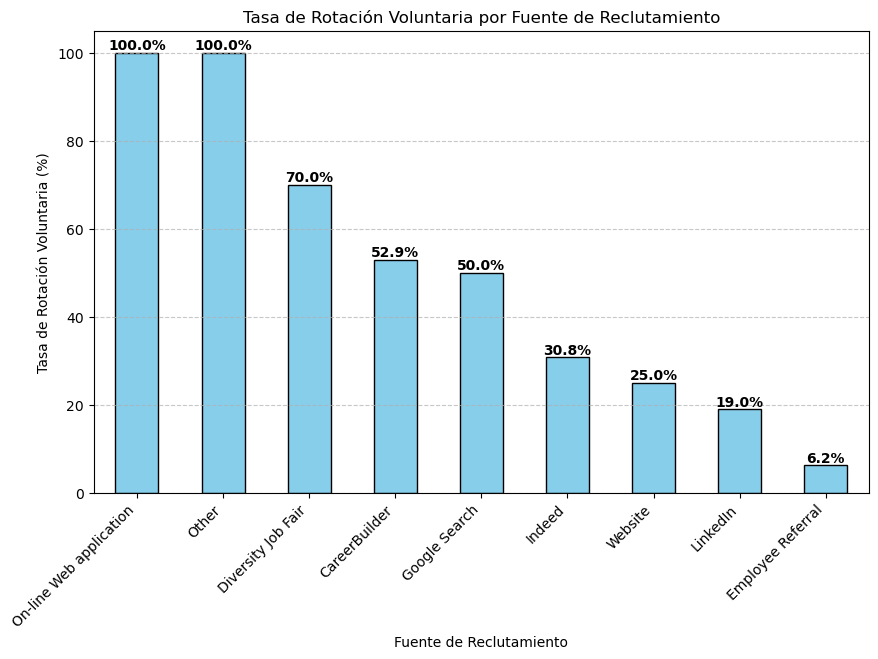

In [ ]:
recruitment = (
        df_production_software.groupby('RecruitmentSource')
        .agg(
            total_empleados=('EmpID', 'count'),
            total_voluntarios=('voluntary_terminated', 'sum')
        )
        .assign(tasa_voluntaria=lambda x: (x['total_voluntarios'] / x['total_empleados']) * 100)
    )

# 🔹 Crear figura y gráfico de barras
plt.figure(figsize=(10, 6))
ax = recruitment['tasa_voluntaria'].sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# 🔹 Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato con 1 decimal y el símbolo %
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posición
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# 🔹 Personalizar gráfico
plt.title("Tasa de Rotación Voluntaria por Fuente de Reclutamiento")
plt.xlabel("Fuente de Reclutamiento")
plt.ylabel("Tasa de Rotación Voluntaria (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 🔹 Mostrar gráfico
plt.show()


Las fuentes de reclutamiento con tasas de rotación voluntaria relevantes son: diversity job fair, career builder y googl search. Las primeras tienen bajo volumen de contrataciones por eso no las consideramos.

                         total_empleados  total_voluntarios  tasa_voluntaria
RecruitmentSource                                                           
Google Search                         46                 23        50.000000
Indeed                                52                 16        30.769231
Diversity Job Fair                    20                 14        70.000000
LinkedIn                              63                 12        19.047619
CareerBuilder                         17                  9        52.941176
Employee Referral                     16                  1         6.250000
On-line Web application                1                  1       100.000000
Other                                  1                  1       100.000000
Website                                4                  1        25.000000


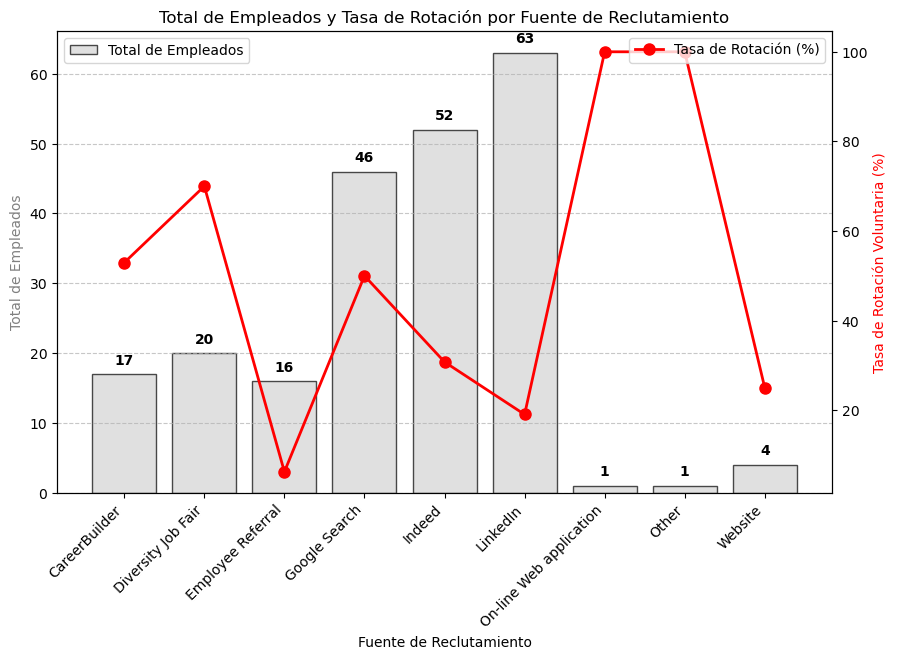

In [ ]:
print(recruitment.sort_values(by='total_voluntarios', ascending=False))
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras: Total de empleados
bars = ax1.bar(recruitment.index, recruitment['total_empleados'], color='lightgray', edgecolor='black', alpha=0.7, label='Total de Empleados')

# Segundo eje Y: Tasa de Rotación Voluntaria en línea roja
ax2 = ax1.twinx()
ax2.plot(recruitment.index, recruitment['tasa_voluntaria'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Tasa de Rotación (%)')

# Agregar etiquetas a las barras de total de empleados
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Personalizar ejes y título
ax1.set_xlabel("Fuente de Reclutamiento")
ax1.set_ylabel("Total de Empleados", color='gray')
ax2.set_ylabel("Tasa de Rotación Voluntaria (%)", color='red')

ax1.set_title("Total de Empleados y Tasa de Rotación por Fuente de Reclutamiento")
ax1.set_xticks(np.arange(len(recruitment.index)))
ax1.set_xticklabels(recruitment.index, rotation=45, ha="right")

ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfico
plt.show()